<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Weighted-and-non-weighted-least-squares-fitting" data-toc-modified-id="Weighted-and-non-weighted-least-squares-fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Weighted and non-weighted least-squares fitting</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/

# Weighted and non-weighted least-squares fitting
To illustrate the use of curve_fit in weighted and unweighted least squares fitting, the following program fits the Lorentzian line shape function centered at x0 with halfwidth at half-maximum (HWHM), γ, amplitude, A:

$$
f(x)=\frac{A \gamma^{2}}{\gamma^{2}+\left(x-x_{0}\right)^{2}}
$$

to some artificial noisy data. The fit parameters are A, γ and x0. The noise is such that a region of the data close to the line centre is much noisier than the rest.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 12]
plt.style.use('fivethirtyeight')
%matplotlib inline
np.random.seed(0)

In [ ]:
# create data
x0, A, gamma = 12, 3, 5
n = 200
x = np.linspace(1, 20, n)
yexact = A * gamma**2 / (gamma**2 + (x-x0)**2)

# Add some noise with a sigma of 0.5 apart from a particularly noisy region
# near x0 where sigma is 3
sigma = np.ones(n)*0.5
sigma[np.abs(x-x0+1)<1] = 3
noise = np.random.randn(n) * sigma
y = yexact + noise

In [ ]:
def f(x, x0, A, gamma):
    """ The Lorentzian entered at x0 with amplitude A and HWHM gamma. """
    return A *gamma**2 / (gamma**2 + (x-x0)**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [ ]:
# Unweighted fit
p0 = 10, 4, 2
popt, pcov = curve_fit(f, x, y, p0)
yfit = f(x, *popt)
print('Unweighted fit parameters:', popt)
print('Covariance matrix:'); print(pcov)
print('rms error in fit:', rms(yexact, yfit))
print()

In [ ]:
# Weighted fit
popt2, pcov2 = curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)
print('Weighted fit parameters:', popt2)
print('Covariance matrix:'); print(pcov2)
print('rms error in fit:', rms(yexact, yfit2))

Unweighted fit parameters: [11.65422705  4.01238013  3.57050989]
Covariance matrix:
[[ 0.04284973 -0.00037071  0.0010949 ]
 [-0.00037071  0.05528202 -0.05277484]
 [ 0.0010949  -0.05277484  0.09945056]]
rms error in fit: 5.978255942756287

Weighted fit parameters: [11.94196926  3.19971229  4.56647071]
Covariance matrix:
[[ 0.01625544 -0.00339452  0.00553605]
 [-0.00339452  0.01299316 -0.02024477]
 [ 0.00553605 -0.02024477  0.04964207]]
rms error in fit: 1.2534799512226444


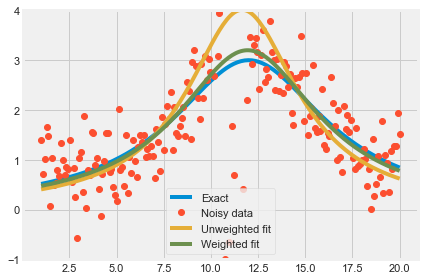

In [5]:
plt.plot(x, yexact, label='Exact')
plt.plot(x, y, 'o', label='Noisy data')
plt.plot(x, yfit, label='Unweighted fit')
plt.plot(x, yfit2, label='Weighted fit')
plt.ylim(-1,4)
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()